# Statistical Power Assignment

In [6]:
import numpy as np
import pandas as pd
import math
from scipy import stats
from statsmodels.stats.power import TTestIndPower

import matplotlib.pyplot as plt

%matplotlib inline

### Computing Sample Size Required

Suppose we are conducting a test where we have:

- Effect size of 0.5
- Significance level of 0.05
- Looking to achieve 80% statistical power

How large of a sample size would we need for this experiment?

In [1]:
from statsmodels.stats.power import TTestIndPower

effect = 0.5
alpha = 0.05
power = 0.8

analysis = TTestIndPower()
result = analysis.solve_power(effect, power=power, nobs1=None, ratio=1.0, alpha=alpha)

print('Sample Size: %.3f' % result)

#64 = 64*2= 128

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Sample Size: 63.766


In [7]:
analysis = TTestIndPower()
result = analysis.solve_power(effect_size=0.5, power=0.8, nobs1=None, ratio=1.0, alpha=0.05)
2*math.ceil(result)

128

### Computing Effect Size Required

Suppose we are conducting a test where we have:

- Sample size of 100
- Significance level of 0.05
- Looking to achieve 80% statistical power

How large of an effect size would we need to see for this experiment?

In [9]:
from numpy import array
from matplotlib import pyplot
from statsmodels.stats.power import TTestIndPower


In [27]:
effect_size = analysis.solve_power(effect_size=None, nobs1=100, alpha=0.05, power=0.8, ratio=1.0)

effect_size

0.39813911739112756

Generate a power plot that shows how the statistical power of this test would change based on the number of observations and varying effect sizes.

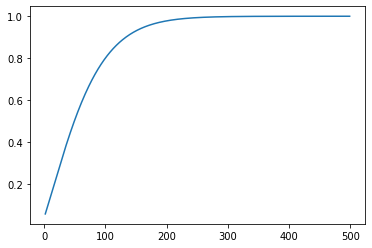

In [31]:
results = []
samples = range(1,500)
for i in samples:

    results.append(analysis.solve_power(effect_size=effect_size, nobs1= i, alpha=0.05, power= None, ratio= 1.0))
plt.plot(samples, results)

### Computing Statistical Power

Suppose we are conducting a test where we have:

- Effect size of 0.4
- Sample size of 100
- Significance level of 0.05

What would be the statistical power for this experiment?

In [32]:
analysis.solve_power(effect_size=0.4, nobs1=100, ratio=1.0, alpha=0.05, power=None)

0.8036474965430769

Generate a plot that examines how the statistical power of this experiment would change based on different significance levels.

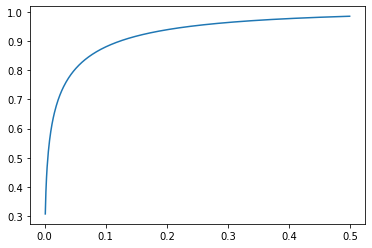

In [37]:
results = []
s_lvls = pd.Series(range(1, 500))
s_lvls = s_lvls/1000
for i in s_lvls:
    results.append(analysis.solve_power(effect_size=0.4, nobs1=100, power=None, ratio=1.0, alpha=i))

plt.plot(s_lvls, results)

## Computing Statistical Power for a Real Data Set

Yesterday afternoon, you conducted a t-test on the titanic data set to determine whether there was a significant difference between the average age of passengers who survived and those who did not survive. In this section, compute the statistical power of that test.

### Import the data, and drop rows where `'Age'` is NA.

In [39]:
data_url = 'https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/titanic.csv'
df = pd.read_csv(data_url)
df.describe

<bound method NDFrame.describe of      PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
0              1         0       3  ...   7.2500   NaN         S
1              2         1       1  ...  71.2833   C85         C
2              3         1       3  ...   7.9250   NaN         S
3              4         1       1  ...  53.1000  C123         S
4              5         0       3  ...   8.0500   NaN         S
..           ...       ...     ...  ...      ...   ...       ...
886          887         0       2  ...  13.0000   NaN         S
887          888         1       1  ...  30.0000   B42         S
888          889         0       3  ...  23.4500   NaN         S
889          890         1       1  ...  30.0000  C148         C
890          891         0       3  ...   7.7500   NaN         Q

[891 rows x 12 columns]>

In [41]:
df = df.dropna()
df_s = df.loc[df['Survived']== 1]
df_n_s = df.loc[df['Survived']== 0]


### Summarize the number of observations and average age per group.

In [44]:
n_obs1 = len(df_n_s['Age'])
n_obs2 = len(df_s['Age'])
mean_of_sample1 = df_n_s['Age'].mean()
mean_of_sample2 = df_s['Age'].mean()

var1 = df_n_s['Age'].var()
var2 = df_s['Age'].var()

### Perform t-test.

In [43]:
stats.ttest_ind(df_n_s['Age'], df_s['Age'])

Ttest_indResult(statistic=3.53435125095576, pvalue=0.0005189503307881672)

### Calculate the Effect Size

Effect size can be calculated by using a formula known as Cohen's d, which divides the difference in means between the two groups by their pooled standard deviation.

`effect_size = (mean_of_sample1 - mean_of_sample2) / pooled_stdev`

The pooled standard deviation in the denominator can be derived as follows.

`pooled_stdev = sqrt(((n_obs1 - 1) * var1 + (n_obs2 - 1) * var2) / (n_obs1 + n_obs2 - 2))`

Where `n_obs` is the number of observations and `var` is the variance of each sample.

**Write the code below to calculate the effect size for this test.**

In [45]:
pooled_stdev = math.sqrt(((n_obs1 - 1) * var1 + (n_obs2 - 1) * var2) / (n_obs1 + n_obs2 - 2))
effect_size = (mean_of_sample1 - mean_of_sample2) / pooled_stdev
ratio = n_obs2/n_obs1
effect_size 

0.5565536974630488

**Use the effect size you calculated to compute the statistical power of this test.**

In [47]:
analysis.solve_power(effect_size=effect_size, nobs1=n_obs1, alpha=0.05, power=None, ratio=ratio)

0.9400951377841825

**Determine the effect size we would need to see to get a statistical power of 0.8.**

In [48]:
analysis.solve_power(effect_size=None, nobs1=n_obs1, alpha=0.05, power=0.8, ratio=ratio)


0.4435226492804944

**Determine the sample size necessary to get a statistical power of 0.8.**

In [49]:
sample_size = analysis.solve_power(effect_size=effect_size, nobs1=None, alpha=0.05, power=0.8, ratio=ratio)
math.ceil(sample_size)

39

**Generate a visualization that shows the significance level we would need to get a statistical power of 0.8.**

0.00785621360820275

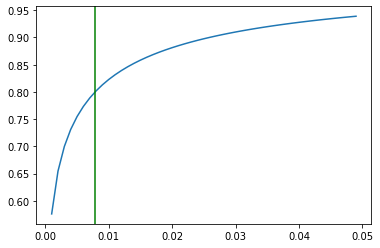

In [51]:
results = []
s_lvls = pd.Series(range(1, 50))
s_lvls = s_lvls/1000
for i in s_lvls:
    results.append(analysis.solve_power(effect_size=effect_size, nobs1=n_obs1, power=None, ratio=ratio, alpha=i))

plt.plot(s_lvls, results)
chart = analysis.solve_power(effect_size=effect_size, nobs1=n_obs1, alpha=None, power=0.8, ratio=ratio)
plt.axvline(chart, color='green')
chart